In [45]:
# General libraries
import numpy as np
import keras

from keras import backend as K
from keras.models import Sequential 
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers import Conv2D
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
%matplotlib inline



In [46]:
input_path='/Users/neeharikasinha/Documents/datascience-course/Capstone1/CXR_model_try'
train_path= input_path+'/train'
valid_path= input_path+'/valid'
test_path= input_path+'/test'

In [47]:
import os
len(os.listdir(train_path+'/normal'))

41

In [53]:
train_batches=ImageDataGenerator().flow_from_directory(train_path,target_size= (224,224),classes=['cardiomegaly','normal'],batch_size=10)
valid_batches=ImageDataGenerator().flow_from_directory(valid_path,target_size= (224,224),classes=['cardiomegaly','normal'],batch_size=5)
test_batches=ImageDataGenerator().flow_from_directory(test_path,target_size= (224,224),classes=['cardiomegaly','normal'],batch_size=5)


Found 80 images belonging to 2 classes.
Found 20 images belonging to 2 classes.
Found 55 images belonging to 2 classes.


In [49]:
def plots(ims,figsize=(12,6),rows=1,interp=False,titles=None):
    if type(ims[0]) is np.ndarray:
        ims=np.array(ims).astype(np.uint8)
        if(ims.shape[-1]!=3):
            ims=ims.transpose((0,2,3,1))
    f=plt.figure(figsize=figsize)
    cols=len(ims)//rows if len(ims)%2==0 else len(ims)//rows+1
    for i in range(len(ims)):
        sp=f.add_subplot(rows,cols,i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i],fontsize=16)
        plt.imshow(ims[i],interpolation=None if interp else 'none')

In [50]:
imgs, labels =next(train_batches)

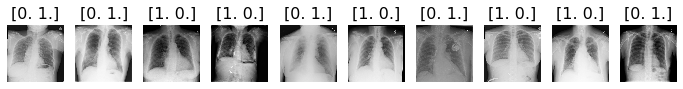

In [51]:
plots(imgs,titles=labels)

In [58]:
model=Sequential([
      Conv2D(32,(3,3),activation='relu',input_shape=(224,224,3)),
    Flatten(),
    Dense(2,activation='softmax',)
])

In [59]:
model.compile(Adam(lr=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [61]:
model.fit_generator(train_batches,steps_per_epoch=4,
                    validation_data=valid_batches,validation_steps=4,epochs=10,verbose=2)



Epoch 1/10
 - 1s - loss: 617.0622 - accuracy: 0.6250 - val_loss: 219.6939 - val_accuracy: 0.6500
Epoch 2/10
 - 1s - loss: 288.0459 - accuracy: 0.6500 - val_loss: 834.2289 - val_accuracy: 0.7500
Epoch 3/10
 - 1s - loss: 102.3912 - accuracy: 0.8000 - val_loss: 0.0000e+00 - val_accuracy: 0.8000
Epoch 4/10
 - 1s - loss: 224.3602 - accuracy: 0.6000 - val_loss: 0.0000e+00 - val_accuracy: 0.8000
Epoch 5/10
 - 1s - loss: 134.9812 - accuracy: 0.7000 - val_loss: 298.0156 - val_accuracy: 0.8000
Epoch 6/10
 - 1s - loss: 193.6447 - accuracy: 0.6500 - val_loss: 144.2008 - val_accuracy: 0.8000
Epoch 7/10
 - 1s - loss: 241.0221 - accuracy: 0.7500 - val_loss: 223.4176 - val_accuracy: 0.8000
Epoch 8/10
 - 1s - loss: 33.3128 - accuracy: 0.8500 - val_loss: 98.2855 - val_accuracy: 0.8000
Epoch 9/10
 - 1s - loss: 25.6785 - accuracy: 0.9500 - val_loss: 167.1542 - val_accuracy: 0.8000
Epoch 10/10
 - 1s - loss: 28.3872 - accuracy: 0.8250 - val_loss: 139.6550 - val_accuracy: 0.8000


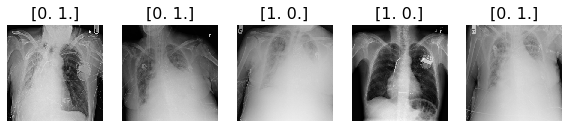

In [79]:
test_imgs,test_labels=next(test_batches)
plots(test_imgs,titles=test_labels)

In [88]:
test_labels=test_labels[:,0]
test_labels


array([0., 0., 1., 1., 0.], dtype=float32)

In [89]:
predictions= model.predict_generator(test_batches,steps=1,verbose=0)

In [90]:
predictions

array([[1.000000e+00, 0.000000e+00],
       [1.000000e+00, 0.000000e+00],
       [1.000000e+00, 1.315953e-26],
       [1.000000e+00, 0.000000e+00],
       [1.000000e+00, 0.000000e+00]], dtype=float32)

In [91]:
cm=confusion_matrix(test_labels,predictions[:,0])

In [85]:
cm

array([[0, 1],
       [0, 4]])

In [94]:
def plot_confusion_matrix(cm,classes,
                         normalize=False,
                         title='Confusion matrix',
                         cmap=plt.cm.Blues):
  
    "This functions prints and plots the confusion matrix."
    "Normalization can be applied by setting 'normalization=True'"
    plt.imshow(cm,interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks,classes, rotation=45)
    plt.yticks(tick_marks,classes)
    
    if normalize:
        cm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)
    
    thresh =cm.max()/2.
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],
                horizontalalignment="center",
                color="white" if cm[i,j]>thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('oredict label')

Confusion matrix, without normalization
[[0 3]
 [0 2]]


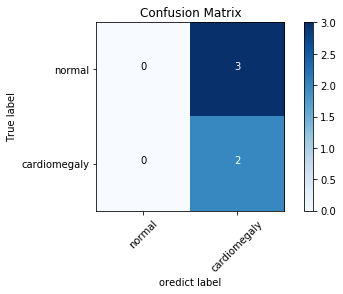

In [95]:
cm_plot_labels=['normal','cardiomegaly']
plot_confusion_matrix(cm,cm_plot_labels,title='Confusion Matrix')